In [3]:
import pandas as pd
import seaborn as sn
from pandas.plotting import scatter_matrix, lag_plot
import matplotlib.pyplot as plt
import numpy as np
import warnings
from Codigo import *
sn.set(style="whitegrid")

In [4]:
Datos = Tachos('../../Alemania_Reducida.csv')
dt = Datos[['PIB (US$ a precios constantes de 2010)','Gasto de consumo final de los hogares (US$ a precios constantes de 2010)','Gasto nacional bruto (US$ a precios constantes de 2010)']].dropna(axis = 0)
dt.columns = ['PIB','Inversión','Gasto']
# Primero le sacaremos el logaritmo a cada una y usaremos la diferencial de estas.
dt_diff = pd.DataFrame()
for columna in dt.columns:
    dt_diff[columna] = np.log(dt[columna])
    dt_diff[columna] = dt_diff[columna].diff()
dt_diff.dropna(axis = 0, inplace= True)
dt_diff.head()

,PIB,Inversión,Gasto
fecha,,,
1971-12-31,0.030846,0.053372,0.040821
1972-12-30,0.042104,0.052461,0.042488
1973-12-31,0.046669,0.028309,0.032657
1974-12-31,0.008861,-0.001817,-0.017045
1975-12-31,-0.008705,0.036613,0.013337


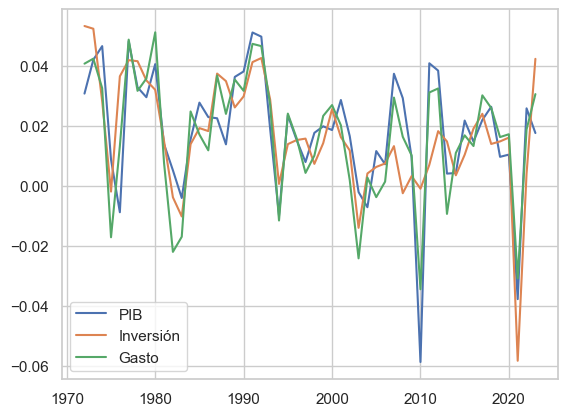

In [5]:
plt.plot(dt_diff, label = dt.columns)
plt.legend()
plt.show()

In [13]:
model = VAR(dt_diff)
orden = model.select_order(maxlags=10)
optimal = orden.selected_orders
print("Orden de lag")
for i in optimal:
    print(f'{i}: {optimal[i]}')

resultado = model.fit(2)
print(GrangeTest(dt_diff,resultado))


Orden de lag
aic: 10
bic: 0
hqic: 0
fpe: 0
    Endogena           Exogenas   p_value
0        PIB          Inversión  0.038212
1        PIB              Gasto  0.589922
2        PIB  [Inversión,Gasto]  0.014352
3  Inversión                PIB  0.928025
4  Inversión              Gasto  0.808614
5  Inversión        [PIB,Gasto]  0.954231
6      Gasto                PIB  0.423866
7      Gasto          Inversión  0.139364
8      Gasto    [PIB,Inversión]  0.196814


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
resultado.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, Dec, 2023
Time:                     11:25:16
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -25.0441
Nobs:                     50.0000    HQIC:                  -25.5413
Log likelihood:           454.337    FPE:                5.98625e-12
AIC:                     -25.8471    Det(Omega_mle):     4.04055e-12
--------------------------------------------------------------------
Results for equation PIB
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.015719         0.004179            3.762           0.000
L1.PIB              -0.343911         0.259207           -1.327           0.185
L1.Inversión         0.362568         0.273393            1.326   

### Analisis del mejor lag
- En todos el mejor es 0 pero revisando cada uno los valores que muestran son bastante buenos con el Akaike menor a 0 por lo que usaremos 2 lags para el analisis

In [7]:
model = VAR(endog = dt_diff[['PIB','Inversión']], exog =dt_diff['Gasto'])
orden = model.select_order(maxlags=10)
optimal = orden.selected_orders
print("Orden de lag")
for i in optimal:
    print(f'{i}: {optimal[i]}')

Orden de lag
aic: 3
bic: 0
hqic: 0
fpe: 3


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
resultados = VAR(dt_diff).fit(3)
resultados.summary()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, Dec, 2023
Time:                     11:23:41
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -24.5819
Nobs:                     49.0000    HQIC:                  -25.3007
Log likelihood:           452.050    FPE:                6.74167e-12
AIC:                     -25.7402    Det(Omega_mle):     3.86189e-12
--------------------------------------------------------------------
Results for equation PIB
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.020375         0.005191            3.925           0.000
L1.PIB              -0.485203         0.271055           -1.790           0.073
L1.Inversión         0.473208         0.290235            1.630   

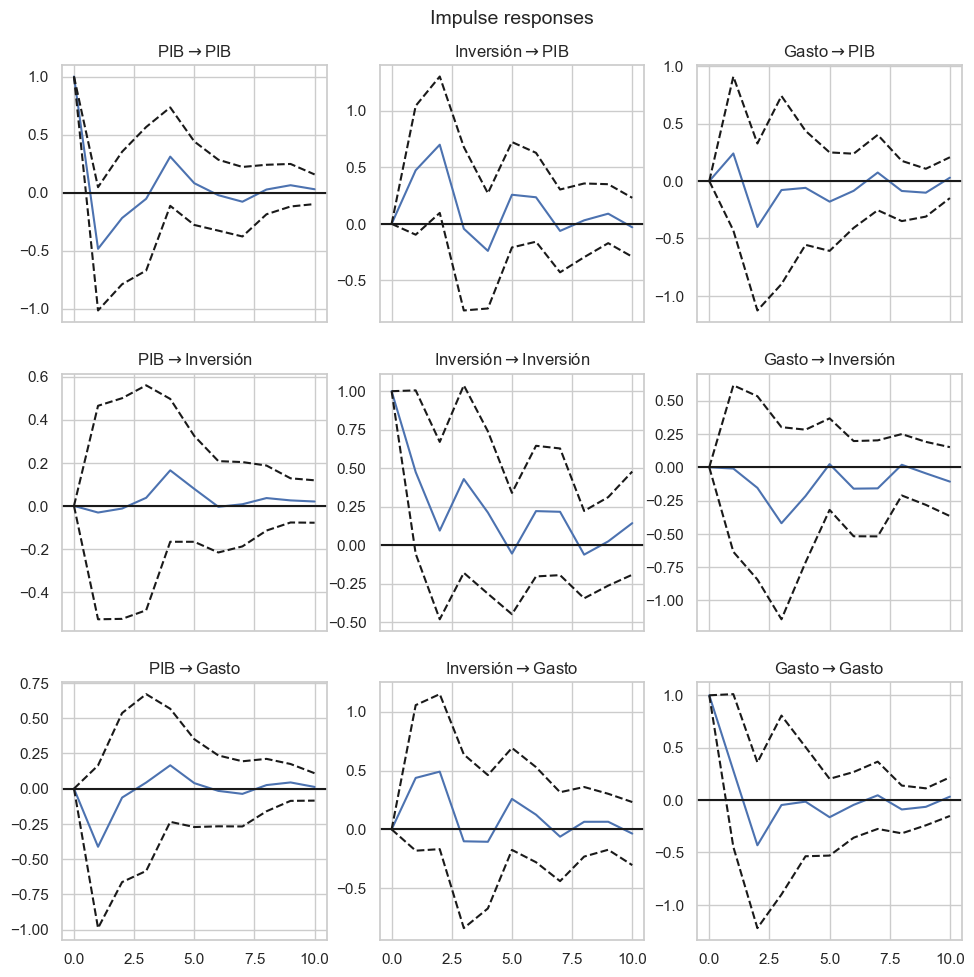

In [9]:
irf = resultados.irf()
irf.plot()
plt.show()

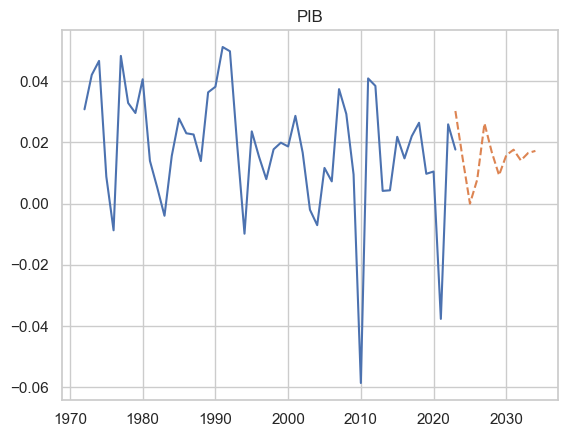

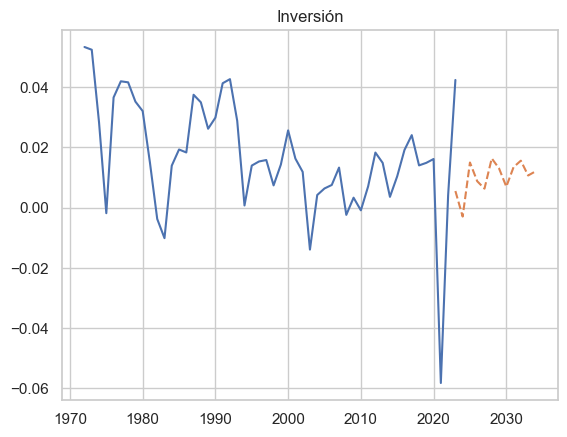

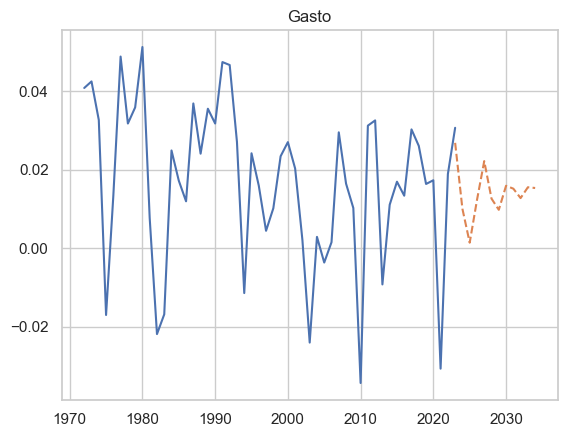

In [10]:
forecast = prediccionVAR(resultados, dt_diff,steps=12)
for i in dt_diff.columns:
    plt.plot(dt_diff[i])
    plt.plot(forecast[i], linestyle = "--")
    plt.title(i)
    plt.show()

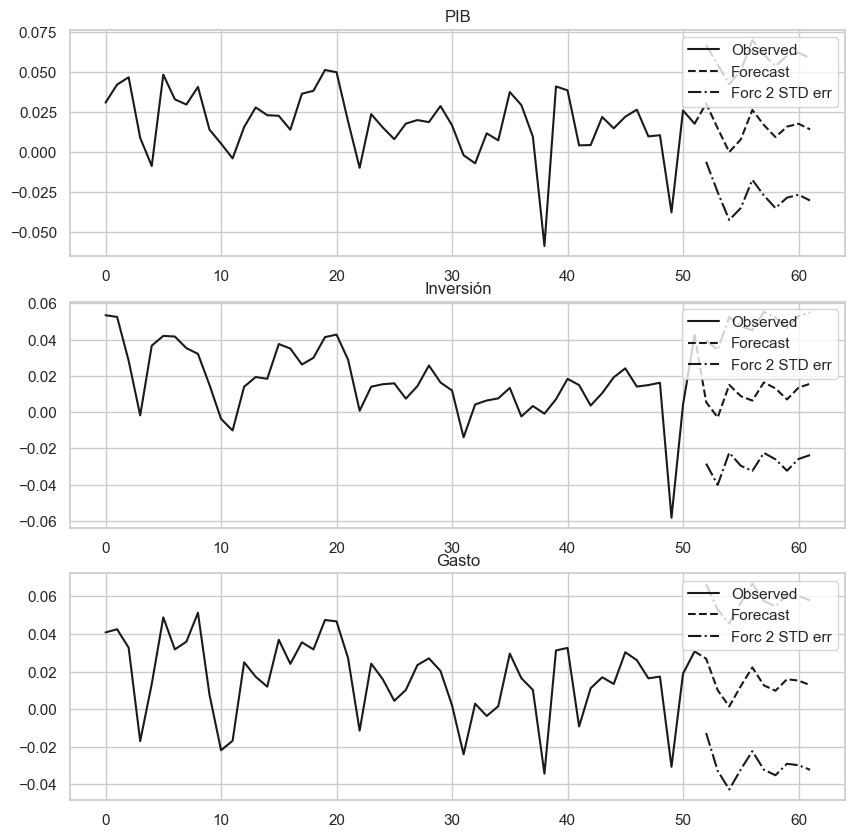

In [11]:
fig = resultados.plot_forecast(10)
plt.show()